<a href="https://colab.research.google.com/github/AbdullahAbdelhakeem6484/ITI_Graduation_Project1_SISR_BY_GAN/blob/main/SRGAN_ITI___BrightSkies_4_DEC_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="float:left"><img src="https://scontent-frx5-1.xx.fbcdn.net/v/t39.30808-6/269112292_1642135339476066_5881567363308810890_n.jpg?_nc_cat=110&ccb=1-5&_nc_sid=730e14&_nc_ohc=KDAUoT1KpG8AX8tqB5t&_nc_ht=scontent-frx5-1.xx&oh=00_AT_Z2eJ9qE2PXjdofiuDnyyQXdPsW9CYQ_Qu8yVgIERpTg&oe=61C872DF" alt="Your Image"> </div>
<div style="float:right">
<table style="width:100%">
  <tr>
    <th>NO.</th>
    <th>Name</th>
    <th>E-mail</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Abdullah Abdelhakeem</td>
    <td>abdullah.abdelhakeem25@gmail.com</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Ahmed Ibrahim</td>
    <td>ahmedibeahim75@gmail.com</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Ahmed Gamal</td>
    <td>agamalagamaleg@gmail.com</td>
  </tr>
  
</table>

</div>


<center>
<h1><font size="+4">Single Image Super Resolution (SRGAN)</font></h1>
</center>

---

<CENTER>
<H1 style="color:red">
<h2>ITI - Brightskies</h2>
<time datetime="2021-12-18">21 December 2021</time>
</H1>
</CENTER>

In [1]:
%%html
<marquee style='width: 70%; color: blue;'><b>Single Image Super Resolution (SRGAN)</b></marquee>

In [2]:
%%html
<marquee style='width: 100%; color: #12AC56;' Direction="Right"><b>Cluster Head of AI_Pro : George Iskander</b></marquee>

In [3]:
%%html
<marquee style='width: 70%; color: brown;' Direction="Left"><b>Supervisor BrightSkies: Ahmed Ayyad</b></marquee>

## SISR ITI BrightSkies


#### Keywords: unsupervised super-resolution, SRGAN-VGG19

In [ ]:
########################################################################################################################################################################################################################################
# Project       :  Single Image Super Resolution (SISR)
# Company_1     :  Brightskies, Alex
# Company_2     :  ITI (Information Technology Institute),Smart Village
#
# Team Members  : 1- Abdullah Abdelhakeem : Mechatronics Engineering
#                 2- Ahmed Gamal          : Computer Science                 
#                 3- Ahmed Ibrahim        : Computer Science
#   
#  
# Evolution     : https://towardsdatascience.com/an-evolution-in-single-image-super-resolution-using-deep-learning-66f0adfb2d6b 
#           
#                 1-Generation #2 of Evolution: SRResNet and Sub-pixel convolution for upsampling
#                 2-Generation #3 of Evolution: Perceptual Loss
#                 3-Generation #1 of Evolution: SRCNN
#                 4-Generation #4 of Evolution: SRGAN
#
#
# Problem :       Computer Vision (Super Resolution)
# version :       2.0.0
#
########################################################################################################################################################################################################################################

## I. Introduction


The computational enhancement of image resolution, is known as *super-resolution*. <b style="color:#ff1245;">Generative Adversarial Networks (GANs) </b> are one of newer methods that have been applied to super resolution and in this notebook we use a  Super-Resolution GAN (SRGAN) to enhance subsampled OCT scans.

The SRGAN, introduced in 2016, addressed the issue of reconstructing high resolution (HR) images from low resolution (LR) images such that fine texture detail in the reconstructed super resolution (SR) images was not lost. Here the authors used a perceptual loss instead of a pixel-wise Mean Squared Error (MSE) loss. MSE loss approaches give a high Peak Signal-to-Noise (PSNR) value, but they also tend to produce overly-smooth images with insufficient high-frequency details. The perceptual loss by contrast has a content loss component that computes pixel-wise differences in feature space (not pixel space) and this results in an SR image that is closer to the subjective evaluation of human observers.

The SRGAN model uses a deep neural network (built with residual blocks) and optimized using perceptual loss in a GAN framework.<br><b>A VGG-19</b> network is used for <u>feature extraction</u>; this allows us to compute the feature distance between the original and generated images sent through the feature extractor.

This architecture used a pre-trained VGG-19 feature extractor and gave photorealistic results on large (4x) upsampled low resolution images. It has been applied to the DIV2K, CelebA and other natural image datasets and here we want to see how it performs on OCT data. This network will serve as a baseline for further experiments with upscaling, choice of feature extractor etcetera.

The SRGAN is implemented as follows:

**Training**
1. We downsample HR OCT images by 4x to synthetically create LR training data. This gives us pairs of HR and LR images for the training data set.
2. The Generator upsamples LR images by 4x and will be trained to generate SR images.
3. The discriminator will be trained to distinguish between HR/SR images; the GAN loss is backpropagated to the discriminator and the generator.

**Evaluation**  
The  visual quality of generated images will be observed. In addition standard quantitative metrics, Peak Signal-to-Noise Ratio and Structural Similarity Index (PSNR, SSIM), will be used to assess the results.


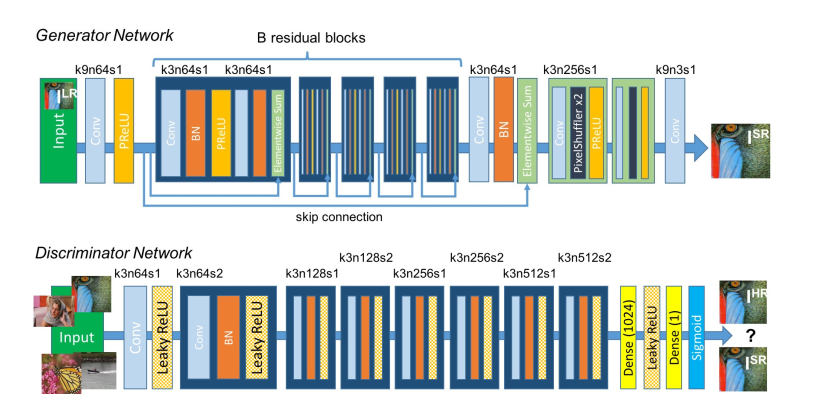

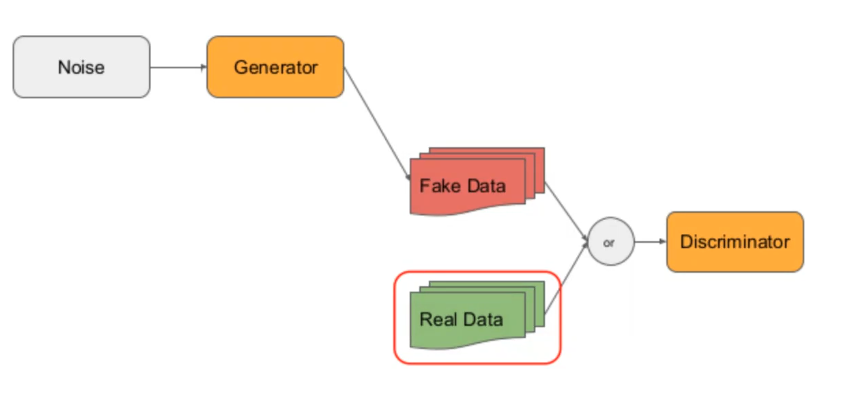

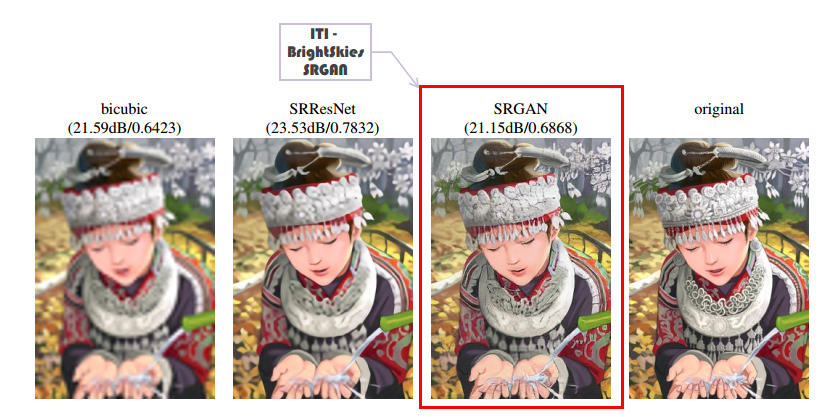

In [ ]:
# from google.colab import drive
# drive._mount('/content/drive')

In [ ]:
!pip install h5py==2.10.0 

     |████████████████████████████████| 2.9 MB 10.7 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


# Load Dataset from Google Drive By ID
https://drive.google.com/file/d/1FecqM21TKwI1GXtL8YOG0bm_x907tXgd/view?usp=sharing

In [ ]:
#1FecqM21TKwI1GXtL8YOG0bm_x907tXgd
#1h3H0Vm4yvMVVQgpJk3s0a304FTpOZGKg
!gdown --id 1h3H0Vm4yvMVVQgpJk3s0a304FTpOZGKg

Permission denied: https://drive.google.com/uc?id=1h3H0Vm4yvMVVQgpJk3s0a304FTpOZGKg
Maybe you need to change permission over 'Anyone with the link'?


In [ ]:
%%capture
!unzip /content/Flickr2K.zip

In [ ]:
!rm /content/Flickr2K.zip

rm: cannot remove '/content/Flickr2K.zip': No such file or directory


In [ ]:
%%capture
!gdown --id 1FecqM21TKwI1GXtL8YOG0bm_x907tXgd

In [ ]:
%%capture
!unzip /content/high_resolution.zip

In [ ]:
!rm /content/high_resolution.zip

In [ ]:
#https://drive.google.com/file/d/1kxv-c2nfwfnkH6bn1JW7VnXa-LoNUYTx/view?usp=sharing
!gdown --id 1kxv-c2nfwfnkH6bn1JW7VnXa-LoNUYTx

Downloading...
From: https://drive.google.com/uc?id=1kxv-c2nfwfnkH6bn1JW7VnXa-LoNUYTx
To: /content/cloth.zip
100% 161M/161M [00:01<00:00, 135MB/s]


In [ ]:
%%capture
!unzip /content/cloth.zip

In [ ]:
!rm /content/cloth.zip

In [ ]:
import os
high_resolutionl_ls = os.listdir("/content/high_resolution")
print(f"type: {type(high_resolutionl_ls)}\n len: {len(high_resolutionl_ls)}")

type: <class 'list'>
 len: 5725


In [ ]:
!rm /content/high_resolution/desktop.ini

In [ ]:
!find /content/high_resolution -type f | wc -l

5724


## II. Imports and globals

In [1]:
# # install an older version of tensorflow 
# # (the implementation may not work with the most recent TensorFlow release)
%%capture
!pip install keras==2.3.1
!pip install tensorflow==2.1.0

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import glob
import os

from keras import Input
from keras.applications import VGG19
from keras.callbacks import TensorBoard
from keras.layers import BatchNormalization, Activation, LeakyReLU, Add, Dense
from keras.layers import Conv2D, UpSampling2D
from keras.models import Model
from keras.optimizers import Adam


import random
from numpy import asarray
from itertools import repeat

import imageio
from imageio import imread
from PIL import Image
from skimage.transform import resize as imresize
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

print("Tensorflow version " + tf.__version__)
print("Keras version " + tf.keras.__version__)

Using TensorFlow backend.


Tensorflow version 2.1.0
Keras version 2.2.4-tf


In [3]:
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model

In [4]:
# data path/content/train/high_res
# TRAIN_PATH = r'/content/high_resolution/'
TRAIN_PATH = r'/content/'
# VAL_PATH = r'/content/val/'
# TEST_PATH = r'../input/kermany2018/OCT2017 /test/'
data_path = TRAIN_PATH

epochs = 5001 #5000

# batch size equals to 8 (due to RAM limits)
batch_size = 4

# define the shape of low resolution image (LR) 
low_resolution_shape = (64, 64, 3)

# define the shape of high resolution image (HR) 
high_resolution_shape = (256, 256, 3)

# optimizer for discriminator, generator 
common_optimizer = Adam(0.0002, 0.5) #Adam(0.003, 0.5)

# use seed for reproducible results
SEED = 2021
tf.random.set_seed(SEED)

In [ ]:
!find /content/cloth -type f | wc -l

5762


In [ ]:
!find /content/high_resolution -type f | wc -l

5724


## III. Data

Load data, process data, EDA

In [5]:
def get_train_images(data_path):
    CLASSES = ["high_resolution"]   #,"cloth"]#"Flickr2K",
    image_list = []

    for class_type in CLASSES:
        image_list.extend(glob.glob(data_path + class_type + '/*'))
    
    return image_list    

In [6]:
def find_img_dims(image_list):
    
    min_size = []
    max_size = []
    
    for i in range(len(image_list)):
        im = Image.open(image_list[i])
        min_size.append(min(im.size))
        max_size.append(max(im.size))    
    return min(min_size), max(max_size)

In [7]:
# for filename in os.listdir("/content/cloth/"):
#     if filename.endswith("b72ed5cd-9f5f-49a7-b12e-63a078212a17.jpg"): 
#          # print(os.path.join(directory, filename))
#         print(1)
#         !rm filename

#     else:
#         continue

In [ ]:
# get min/max image sizes
image_list = get_train_images(data_path)
min_size, max_size = find_img_dims(image_list)
print('The min and max image dims are {} and {} respectively.'
      .format(min_size, max_size))

The min and max image dims are 256 and 5380 respectively.


In [ ]:
len(image_list)

5724

## IV. Utility functions

Quantitative metrics for image quality  
Loss functions  
Plots  
Image processing: sampling and saving images

### IV A. Metrics

#### 1. PSNR - Peak Signal-to-Noise ratio


PSNR is the ratio between maximum possible power of signal and power of corrupting noise (Wikipedia). 


$${ PSNR = 10  \log_{10}  \left( {MAX_I^2 \over MSE} \right) }$$

$ MAX_I $  -  maximum possible power of a signal of image I  
$ MSE $  -  mean squared error pixel by pixel 

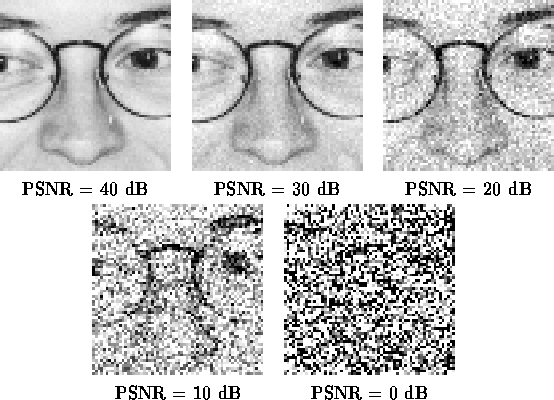

In [8]:
def compute_psnr(original_image, generated_image):
    
    original_image = tf.convert_to_tensor(original_image, dtype=tf.float32)
    generated_image = tf.convert_to_tensor(generated_image, dtype=tf.float32)
    psnr = tf.image.psnr(original_image, generated_image, max_val=1.0)

    return tf.math.reduce_mean(psnr, axis=None, keepdims=False, name=None)

In [9]:
def plot_psnr(psnr):
    psnr_means = psnr['psnr_quality']
    plt.figure(figsize=(10,8))
    plt.plot(psnr_means)    
    plt.xlabel('Epochs')
    plt.ylabel('PSNR') 
    plt.title('PSNR')

#### 2. SSIM - Structural Similarity Index


SSIM measures the perceptual difference between two similar images [(see Wikipedia)](https://en.wikipedia.org/wiki/Structural_similarity).

$${ SSIM(x, y) = {(2 \mu_x \mu_y + c_1) (2 \sigma_{xy} + c_2) \over (\mu_x^2 + \mu_y^2 + c_1) ( \sigma_x^2 + \sigma_y^2 +c_2)}  }$$


$ \mu_x, \mu_y$       - average value for image $x, y$    
$ \sigma_x, \sigma_y$ - standard deviation for image $x, y$     
$ \sigma_{xy}$        - covariance  of $x$ and $y$      
$ c_1, c_2 $          - coefficients 

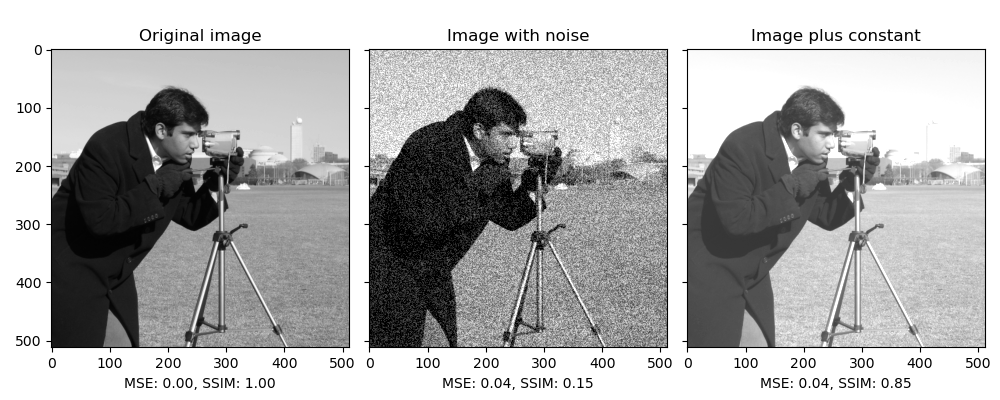

In [10]:
def compute_ssim(original_image, generated_image):
    
    original_image = tf.convert_to_tensor(original_image, dtype=tf.float32)
    generated_image = tf.convert_to_tensor(generated_image, dtype=tf.float32)
    ssim = tf.image.ssim(original_image, generated_image, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)

    return tf.math.reduce_mean(ssim, axis=None, keepdims=False, name=None)

In [11]:
def plot_ssim(ssim):
    
    ssim_means = ssim['ssim_quality']

    plt.figure(figsize=(10,8))
    plt.plot(ssim_means)
    plt.xlabel('Epochs')
    plt.ylabel('SSIM')
    plt.title('SSIM')

### IV B. Loss Functions

The most important contribution of the SRGAN paper was the use of a *perceptual loss* function. 


**Perceptual Loss**  is a weighted sum of the *content loss* and *adversarial loss*.


$${ l^{SR} = l_X^{SR} + 10^{-3}l_{Gen}^{SR}}$$

$l^{SR}$ - perceptual loss   
$l_X^{SR}$ - content loss   
$l_{Gen}^{SR}$ - adversarial loss 


****************************

**1. Content Loss**   
The SRGAN replaced the *MSE loss* with a *VGG loss*. Both losses are defined below: 

         
**Pixel-wise MSE loss** is the mean squared error between each pixel in the original HR image and a the corresponding pixel in the generated SR image.


**VGG loss** is the euclidean distance between the feature maps of the generated SR image and the original HR  image. The feature maps are the activation layers of the pre-trained  VGG 19 network. 

$${ l_{{VGG}/{i,j}}^{SR} = {1 \over {W_{i,j}H_{i,j}}} \sum\limits_{x=1}^{W_{i,j}} \sum\limits_{y=1}^{H_{i,j}}  ({\phi}_{i,j}(I^{HR})_{x,y} - {\phi}_{i,j} (G_{{\theta}_G} (I^{LR}))_{x,y})^2}$$


$ l_{{VGG}/{i,j}}^{SR} $  -  VGG loss    
$ {\phi}_{i,j} $  -   the feature map obtained by the j-th convolution (after activation) before the i-th maxpooling layer within the VGG19 network



**2. Adversarial Loss**  
This is calculated based on probabilities provided by Discriminator.

$${ l_{Gen}^{SR} = \sum\limits_{n=1}^{N} - \log{D_{{\theta}_D}} (G_{{\theta}_G} (I^{LR}))}$$

$ l_{Gen}^{SR} $  -  generative loss  
$ D $  -  discriminator function    
$ D_{{\theta}_D} $  -  discriminator function parametrized with $ {\theta}_D $   
$ {D_{{\theta}_D}} (G_{{\theta}_G} (I^{LR})) $   -  probability that the reconstructed image $ 
$ G_{{\theta}_G} (I^{LR}) $  is a natural HR image

#### Plot loss function

In [12]:
def plot_loss(losses):

    d_loss = losses['d_history']
    g_loss = losses['g_history']
    
   
    plt.figure(figsize=(10,8))
    plt.plot(d_loss, label="Discriminator loss")
    plt.plot(g_loss, label="Generator loss")
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title("Loss")    
    plt.legend()

### IV C. Sampling, saving images

In [13]:
def sample_images(image_list, batch_size, high_resolution_shape, low_resolution_shape):
    
    """
    Pre-process a batch of training images
    """
    
    # image_list is the list of all images
    # ransom sample a batch of images
    images_batch = np.random.choice(image_list, size=batch_size)
    
    lr_images = []
    hr_images = []
    

    for img in images_batch:
  
        img1 = imread(img, as_gray=False, pilmode='RGB')
        #img1 = imread(img, pilmode='RGB')
        img1 = img1.astype(np.float32)
        
        # change the size     
        img1_high_resolution = imresize(img1, high_resolution_shape)
        img1_low_resolution = imresize(img1, low_resolution_shape)
                

        # do a random horizontal flip
        if np.random.random() < 0.5:
            img1_high_resolution = np.fliplr(img1_high_resolution)
            img1_low_resolution = np.fliplr(img1_low_resolution)
       
        hr_images.append(img1_high_resolution)
        lr_images.append(img1_low_resolution)
        
   
    # convert lists into numpy ndarrays
    return np.array(hr_images), np.array(lr_images)    

In [14]:
def save_images(original_image, lr_image, sr_image, path):
    
    """
    Save LR, HR (original) and generated SR
    images in one panel 
    """
    
    fig, ax = plt.subplots(1,3, figsize=(10, 6))

    images = [original_image, lr_image, sr_image]
    titles = ['HR', 'LR','SR - generated']

    for idx,img in enumerate(images):
        # (X + 1)/2 to scale back from [-1,1] to [0,1]
        ax[idx].imshow((img + 1)/2.0, cmap='gray')
        ax[idx].axis("off")
    for idx, title in enumerate(titles):    
        ax[idx].set_title('{}'.format(title))
        
    plt.savefig(path)    

## V. SRGAN-VGG19

The SRGAN has the following code components:
 1. Generator network
 2.  Discriminator network
 3. Feature extractor using the VGG19 network
 4. Adversarial framework

### V 1. Generator

There are 16 residual blocks and 2 upsampling blocks. The generator follows the architecture outlined in [2]. 

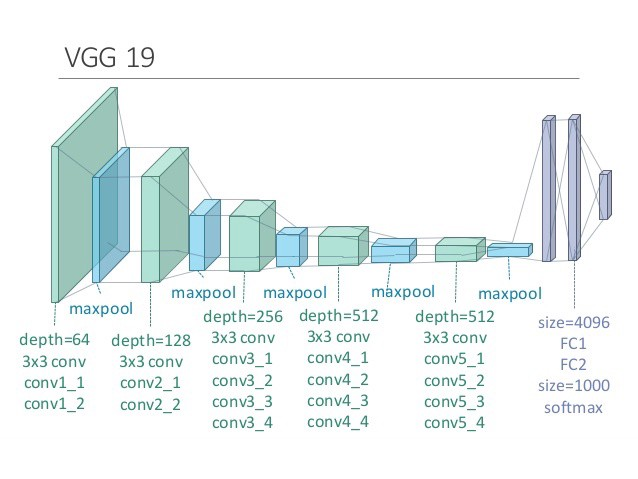

In [15]:
def residual_block(x):

    filters = [64, 64]
    kernel_size = 3
    strides = 1
    padding = "same"
    momentum = 0.8
    activation = "relu"

    res = Conv2D(filters=filters[0], kernel_size=kernel_size, strides=strides, padding=padding)(x)
    res = Activation(activation=activation)(res)
    res = BatchNormalization(momentum=momentum)(res)

    res = Conv2D(filters=filters[1], kernel_size=kernel_size, strides=strides, padding=padding)(res)
    res = BatchNormalization(momentum=momentum)(res)

    res = Add()([res, x])
    
    return res

In [16]:
def build_generator():
    
    # use 16 residual blocks in generator
    residual_blocks = 16
    momentum = 0.8
    
    # input LR dimension: 4x downsample of HR
    input_shape = (64, 64, 3)
    
    # input for the generator
    input_layer = Input(shape=input_shape)
    
    # pre-residual block: conv layer before residual blocks 
    gen1 = Conv2D(filters=64, kernel_size=9, strides=1, padding='same', activation='relu')(input_layer)
    
    # add 16 residual blocks
    res = residual_block(gen1)
    for i in range(residual_blocks - 1):
        res = residual_block(res)
    
    # post-residual block: conv and batch-norm layer after residual blocks
    gen2 = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(res)
    gen2 = BatchNormalization(momentum=momentum)(gen2)
    
    # take the sum of pre-residual block(gen1) and post-residual block(gen2)
    gen3 = Add()([gen2, gen1])
    
    # upsampling
    gen4 = UpSampling2D(size=2)(gen3)
    gen4 = Conv2D(filters=256, kernel_size=3, strides=1, padding='same')(gen4)
    gen4 = Activation('relu')(gen4)
    
    # upsampling
    gen5 = UpSampling2D(size=2)(gen4)
    gen5 = Conv2D(filters=256, kernel_size=3, strides=1, padding='same')(gen5)
    gen5 = Activation('relu')(gen5)
    
    # conv layer at the output
    gen6 = Conv2D(filters=3, kernel_size=9, strides=1, padding='same')(gen5)
    output = Activation('tanh')(gen6)
    
    # model 
    model = Model(inputs=[input_layer], outputs=[output], name='generator')

    return model

In [17]:
generator = build_generator()

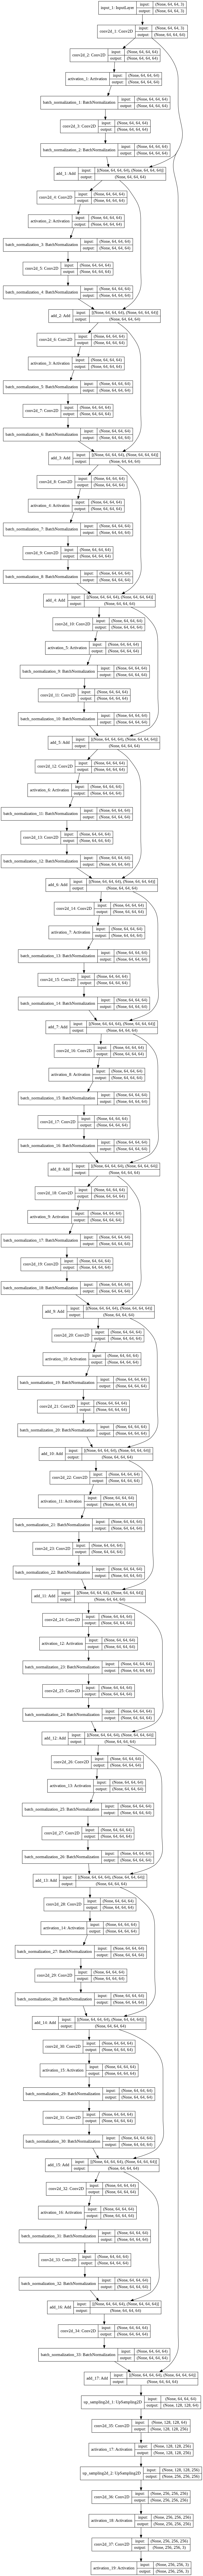

In [18]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
from keras.utils.vis_utils import plot_model
plot_model(generator, to_file="generator.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('generator.png'))

### V 2. Discriminator

In [19]:
def build_discriminator():
    
    # define hyperparameters
    leakyrelu_alpha = 0.2
    momentum = 0.8
    
    # the input is the HR shape
    input_shape = (256, 256, 3)
    
    # input layer for discriminator
    input_layer = Input(shape=input_shape)
    
    # 8 convolutional layers with batch normalization  
    dis1 = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(input_layer)
    dis1 = LeakyReLU(alpha=leakyrelu_alpha)(dis1)

    dis2 = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(dis1)
    dis2 = LeakyReLU(alpha=leakyrelu_alpha)(dis2)
    dis2 = BatchNormalization(momentum=momentum)(dis2)

    dis3 = Conv2D(filters=128, kernel_size=3, strides=1, padding='same')(dis2)
    dis3 = LeakyReLU(alpha=leakyrelu_alpha)(dis3)
    dis3 = BatchNormalization(momentum=momentum)(dis3)

    dis4 = Conv2D(filters=128, kernel_size=3, strides=2, padding='same')(dis3)
    dis4 = LeakyReLU(alpha=leakyrelu_alpha)(dis4)
    dis4 = BatchNormalization(momentum=0.8)(dis4)

    dis5 = Conv2D(256, kernel_size=3, strides=1, padding='same')(dis4)
    dis5 = LeakyReLU(alpha=leakyrelu_alpha)(dis5)
    dis5 = BatchNormalization(momentum=momentum)(dis5)

    dis6 = Conv2D(filters=256, kernel_size=3, strides=2, padding='same')(dis5)
    dis6 = LeakyReLU(alpha=leakyrelu_alpha)(dis6)
    dis6 = BatchNormalization(momentum=momentum)(dis6)

    dis7 = Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(dis6)
    dis7 = LeakyReLU(alpha=leakyrelu_alpha)(dis7)
    dis7 = BatchNormalization(momentum=momentum)(dis7)

    dis8 = Conv2D(filters=512, kernel_size=3, strides=2, padding='same')(dis7)
    dis8 = LeakyReLU(alpha=leakyrelu_alpha)(dis8)
    dis8 = BatchNormalization(momentum=momentum)(dis8)
    
    # fully connected layer 
    dis9 = Dense(units=1024)(dis8)
    dis9 = LeakyReLU(alpha=0.2)(dis9)
    
    # last fully connected layer - for classification 
    output = Dense(units=1, activation='sigmoid')(dis9)   
    
    model = Model(inputs=[input_layer], outputs=[output], name='discriminator')
    
    return model

In [20]:
discriminator = build_discriminator()
discriminator.trainable = True
discriminator.compile(loss='mse', optimizer=common_optimizer, metrics=['accuracy'])

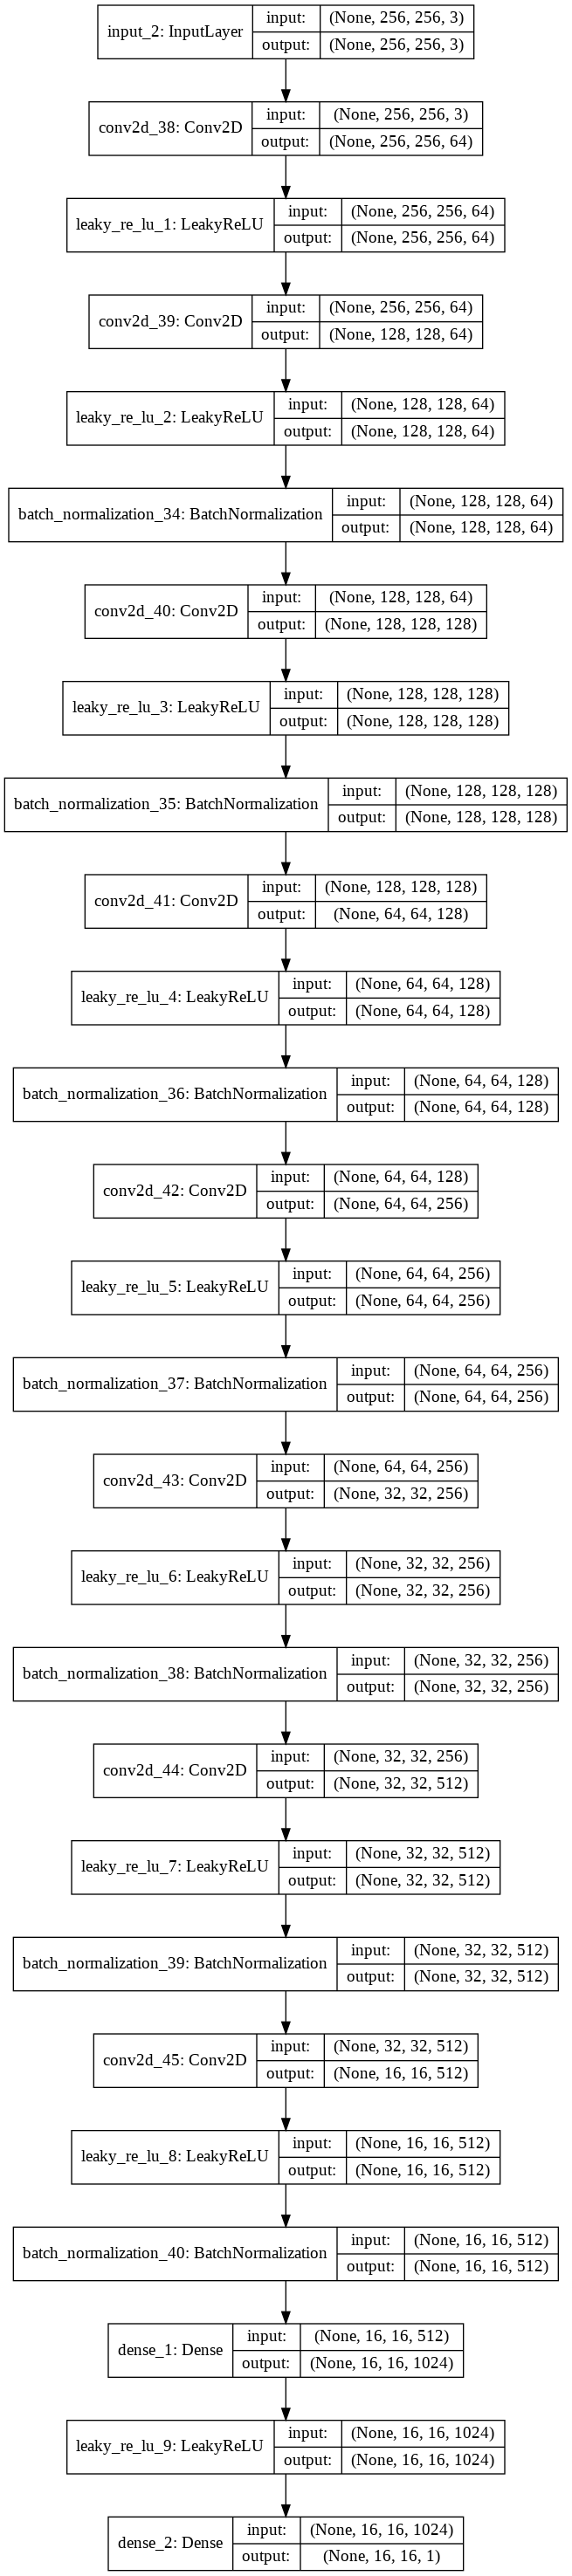

In [21]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
from keras.utils.vis_utils import plot_model
plot_model(discriminator, to_file="discriminator.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('discriminator.png'))

### V 3. VGG19 Feature Extractor 

In [22]:
#load the pretrained model VGG , trained on imagenet data
VGG19_base = VGG19(weights="imagenet")

574717952/574710816 [==============================] - 17s 0us/step


In [23]:
VGG19_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [24]:
def build_VGG19():
    
    input_shape = (256, 256, 3)
    VGG19_base.outputs = [VGG19_base.get_layer('block5_conv2').output]
    input_layer = Input(shape=input_shape)
    #list of layer objects that are specified by layer names
    #layer that make generation
    features = VGG19_base(input_layer)
    #create the model that outputs content  and style are specified by layer names
    model = Model(inputs=[input_layer], outputs=[features])
    
    return model

In [25]:
fe_model = build_VGG19()
fe_model.trainable = False
fe_model.compile(loss='mse', optimizer=common_optimizer, metrics=['accuracy'])

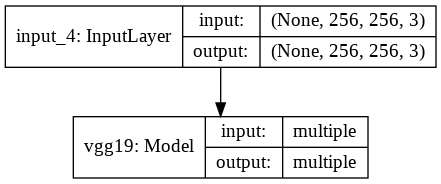

In [26]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
from keras.utils.vis_utils import plot_model
plot_model(fe_model, to_file="fe_model.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('fe_model.png'))

In [27]:
def build_adversarial_model(generator, discriminator, feature_extractor):
    
    # input layer for high-resolution images
    input_high_resolution = Input(shape=high_resolution_shape)

    # input layer for low-resolution images
    input_low_resolution = Input(shape=low_resolution_shape)

    # generate high-resolution images from low-resolution images
    generated_high_resolution_images = generator(input_low_resolution)

    # extract feature maps from generated images
    features = feature_extractor(generated_high_resolution_images)
    
    # make a discriminator non-trainable 
    discriminator.trainable = False
    discriminator.compile(loss='mse', optimizer=common_optimizer, metrics=['accuracy'])

    # discriminator will give us a probability estimation for the generated high-resolution images
    probs = discriminator(generated_high_resolution_images)

    # create and compile 
    adversarial_model = Model([input_low_resolution, input_high_resolution], [probs, features])
    adversarial_model.compile(loss=['binary_crossentropy', 'mse'], loss_weights=[1e-3, 1], optimizer=common_optimizer)
    
    return adversarial_model


In [28]:
adversarial_model = build_adversarial_model(generator, discriminator, fe_model)

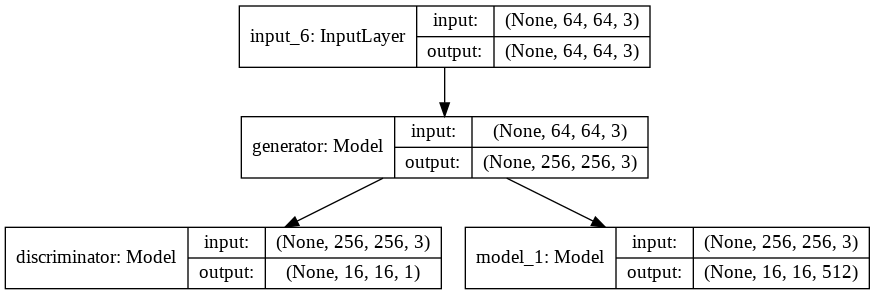

In [29]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
from keras.utils.vis_utils import plot_model
plot_model(adversarial_model, to_file="adversarial_model.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('adversarial_model.png'))

## VI. Training 


In [30]:
# initialize 

losses = {"d_history":[], "g_history":[]}
psnr = {'psnr_quality': []}
ssim = {'ssim_quality': []}

In [ ]:

# filepath="weights.best.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]
# # Fit the model
# model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)

In [ ]:
# !pip install 'h5py==2.10.0' --force-reinstall

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
#/content/drive/MyDrive/result

In [ ]:
# training loop

for epoch in range(epochs):

    print("Epoch {}/{}".format(epoch+1 ,epochs)) 

    d_history = []
    g_history = []
    
    image_list = get_train_images(data_path)
    
    """
    Train the discriminator network
    """
    
    hr_images, lr_images = sample_images(image_list, 
                                         batch_size=batch_size,
                                         low_resolution_shape=low_resolution_shape,
                                         high_resolution_shape=high_resolution_shape)
    
    
    # normalize the images
    hr_images = hr_images / 127.5 - 1.
    lr_images = lr_images / 127.5 - 1.
    
    # generate high-resolution images from low-resolution images
    generated_high_resolution_images = generator.predict(lr_images)
    
    # generate a batch of true and fake labels 
    real_labels = np.ones((batch_size, 16, 16, 1))
    fake_labels = np.zeros((batch_size, 16, 16, 1))
    
 
    d_loss_real = discriminator.train_on_batch(hr_images, real_labels)
    d_loss_real =  np.mean(d_loss_real)
    d_loss_fake = discriminator.train_on_batch(generated_high_resolution_images, fake_labels)
    d_loss_fake =  np.mean(d_loss_fake)
    
    # calculate total loss of discriminator as average loss on true and fake labels
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    losses['d_history'].append(d_loss)
   

    """
        Train the generator network
    """
      
    # sample a batch of images    
    hr_images, lr_images = sample_images(image_list, 
                                         batch_size=batch_size,
                                         low_resolution_shape=low_resolution_shape,
                                         high_resolution_shape=high_resolution_shape)
    
    
    # normalize the images
    hr_images = hr_images / 127.5 - 1.
    lr_images = lr_images / 127.5 - 1.
    
    
    
    # extract feature maps for true high-resolution images
    image_features = fe_model.predict(hr_images)


    
    # train the generator
    g_loss = adversarial_model.train_on_batch([lr_images, hr_images],
                                               [real_labels, image_features])
    
    losses['g_history'].append(0.5 * (g_loss[1]))
    
    
    
    # calculate the psnr  
    ps = compute_psnr(hr_images, generated_high_resolution_images) 
    psnr['psnr_quality'].append(ps)
            
    # calculate the ssim 
    ss = compute_ssim(hr_images, generated_high_resolution_images)   
    ssim['ssim_quality'].append(ss)

    
    #################################
    # Losses
    print(f"@Epoch: {epoch}\tD_loss: {d_loss}\tG_loss: {g_loss}\tPSNR:{ps}\tSSIM:{ss}")
    #print(f"@Epoch: {epoch}\tPSNR:{ps}\tSSIM:{ss}")
    print("__"*15) 
    ################################
    """
        save and print image samples
    """
    
    if epoch % 500 == 0:
        generator.save(f"/content/drive/MyDrive/Output/Try22_12_2021_Seb/generator_{epoch}.h5")
        hr_images, lr_images = sample_images(image_list, 
                                             batch_size=batch_size,
                                             low_resolution_shape=low_resolution_shape,
                                             high_resolution_shape=high_resolution_shape)
        # normalize the images
        hr_images = hr_images / 127.5 - 1.
        lr_images = lr_images / 127.5 - 1.
    
    
        generated_images = generator.predict_on_batch(lr_images)
    
        for index, img in enumerate(generated_images):
            if index < 3:   # comment this line to display all the images
                save_images(hr_images[index], lr_images[index], img,
                            path="/content/drive/MyDrive/Output/Try22_12_2021_Seb/img_{}_{}".format(epoch, index))  

In [ ]:
# print(f"@Epoch: {epoch}\tD_loss: {d_loss}\tG_loss: {g_loss}\tPSNR:{psnr}\tSSIM:{ssim}")
print(f"PSNR:{ps}\nSSIM:{ss}")

PSNR:3.4512717723846436
SSIM:0.028484871610999107


In [ ]:
# plots - post training
plot_loss(losses)
plot_psnr(psnr)
plot_ssim(ssim)

In [ ]:
# save model weights

generator.save("/content/drive/MyDrive/Output/Try22_12_2021_Seb/Final_model.h5")
# discriminator.save("/content/srgan_discriminator_model.h5")
# adversarial_model.save("/content/srgan_adversarial_model.h5")

In [ ]:
import time
generator._get_distribution_strategy = lambda: None
discriminator._get_distribution_strategy = lambda: None

tensorboard = TensorBoard(log_dir="/content/drive/MyDrive/Output/Try22_12_2021_Seb/logs/".format(time.time()))
tensorboard.set_model(generator)
tensorboard.set_model(discriminator)

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/Output/Try22_12_2021_Seb/logs

# Prediction

In [ ]:
def sample_images_test(img):

    
    lr_images = []
    
    img1 = imread(img, as_gray=False, pilmode='RGB')
    img1 = img1.astype(np.float32)
    
    img1_low_resolution = imresize(img1, (64, 64, 3))
          

    # do a random horizontal flip
    if np.random.random() < 0.5:
        img1_low_resolution = np.fliplr(img1_low_resolution)
    
    lr_images.append(img1_low_resolution)
        
   
    # convert lists into numpy ndarrays
    return  np.array(lr_images)    

In [ ]:
def save_images_test(original_image , sr_image, path):
    
    """
    Save LR, HR (original) and generated SR
    images in one panel 
    """
    
    fig, ax = plt.subplots(1,2, figsize=(10, 6))

    images = [original_image, sr_image]
    titles = ['OR','SR']

    for idx,img in enumerate(images):
        # (X + 1)/2 to scale back from [-1,1] to [0,1]
        ax[idx].imshow((img + 1)/2.0, cmap='gray')
        ax[idx].axis("off")
    for idx, title in enumerate(titles):    
        ax[idx].set_title('{}'.format(title))
        
    plt.savefig(path)    

In [ ]:
img ="/content/high_resolution/0008.png"
lr_images = sample_images_test(img)

In [ ]:
# normalize the images
lr_images = lr_images / 127.5 - 1.
generated_images = generator.predict_on_batch(lr_images)

In [ ]:
lr_images2 = lr_images.reshape((64,64,3))
generated_images2= generated_images.reshape((256,256,3))


In [ ]:
save_images_test(lr_images2 ,generated_images2 ,"/content/drive/MyDrive/Output/Try22_12_2021_Seb/prediction/img.png")

In [ ]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Load saved Model and Predict

In [ ]:
model =load_model('/content/drive/MyDrive/Output/Try22_12_2021_Seb/Final_model.h5')

In [ ]:
img ="/content/high_resolution/25.png"
lr_img = sample_images_test(img)

In [ ]:
# normalize the images
lr_img = lr_img / 127.5 - 1.
generated_img = model.predict_on_batch(lr_img)

In [ ]:
lr_images_saved_m = lr_img.reshape((64,64,3))
generated_images_saved_m= generated_img.reshape((256,256,3))


In [ ]:
save_images_test(lr_images_saved_m ,generated_images_saved_m ,"/content/")

In [ ]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Production

In [ ]:
# !pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image


import cv2
import numpy as np
import pandas as pd
#import tensorflow as tf
#from tensorflow import keras

import glob
import os

import random
from numpy import asarray
from itertools import repeat

import imageio
from imageio import imread
from PIL import Image
from skimage.transform import resize as imresize
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model

#print("Tensorflow version " + tf.__version__)
#print("Keras version " + tf.keras.__version__)

def sample_images_test(img):

    
    lr_images = []
    
    img1 = imread(img, as_gray=False, pilmode='RGB')
    img1 = img1.astype(np.float32)
    
    img1_low_resolution = imresize(img1, (64, 64, 3))
          

    # do a random horizontal flip
    if np.random.random() < 0.5:
        img1_low_resolution = np.fliplr(img1_low_resolution)
    
    lr_images.append(img1_low_resolution)
        
   
    # convert lists into numpy ndarrays
    return  np.array(lr_images)    



def save_images_test(original_image , sr_image, path):
    
    """
    Save LR, HR (original) and generated SR
    images in one panel 
    """
    
    fig, ax = plt.subplots(1,2, figsize=(10, 6))

    images = [original_image, sr_image]
    titles = ['OR','SR']

    for idx,img in enumerate(images):
        # (X + 1)/2 to scale back from [-1,1] to [0,1]
        ax[idx].imshow((img + 1)/2.0, cmap='gray')
        ax[idx].axis("off")
    for idx, title in enumerate(titles):    
        ax[idx].set_title('{}'.format(title))
        
    plt.savefig(path)
    


# @st.cache
def fetch_model():
    return load_model('generator_7500.h5', compile=False)

loaded_model = fetch_model()

def pred_img(x):
    model = fetch_model()
    img =x        #"4.png"
    lr_img = sample_images_test(img)
    # normalize the images
    lr_img = (lr_img / 127.5) - 1
    generated_img = model.predict_on_batch(lr_img)
    lr_images_saved_m = lr_img.reshape((64,64,3))
    generated_images_saved_m= generated_img.reshape((256,256,3))
    save_images_test(lr_images_saved_m ,generated_images_saved_m ,"D:/02-AI Program/ALL SUBJECT/07-Deployment/02-SRGAN Deploy/predict_app/Saved/Omodel")
	#return generated_images_saved_m
    #st.image(generated_images_saved_m, clamp=True)
    #age(uploaded_image, width=240)
    #image = cv2.imdecode(np.fromstring(uploaded_image.read(), np.uint8), 1)
    image = generated_images_saved_m #(generated_images_saved_m + 1)/2.0
    st.image(image,clamp=True)


st.title('Single Image Super Resolution')
st.write('By Using Approach Called GAN : Generator and Descriminator')
st.markdown('----')

#col1, col2 = st.columns([2,1])
col1, col2 = st.columns([2,1])

with col1:
    raw_image = st.file_uploader('Upload an Image')

    if raw_image:
        st.image(raw_image)

with col2:
    #st.write('Make a Prediction')
    if st.button('Run Model'):
        pred_img(raw_image)
		#st.image(predicted_image)
        #st.write(f'Prediction:  {pred_img(raw_image)}')
		
		

        
		

Writing app.py


In [ ]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.136.160.200:8501

2021-12-17 07:44:00.197703: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
  Stopping...
  Stopping...


#Requirement

In [35]:
# !pip install session-info

In [33]:
import session_info
session_info.show()

In [34]:
%%writefile requirement.txt
PIL>=7.1.2
imageio>=2.4.1
keras>=2.3.1
matplotlib>=3.2.2
numpy>=1.19.5
pandas>=1.1.5
pydot>=1.3.0
session_info>=1.0.0
skimage>=0.18.3
tensorflow>=2.1.0
tensorflow_core>=2.1.0
IPython>=5.5.0
jupyter_client>=5.3.5
jupyter_core>=4.9.1
notebook>=5.3.1
Python>=3.7.12 

Writing requirement.txt


<h1 style="color:red;text-align:center;">ITI - BrightSkies</h1>

<ol type="I">
<li style="color:#827845;">Abdullah Abdelhakeem</li>
<li style="color:#277845;">Ahmed Gamal</li>
<li style="color:#137845;">Ahmed Ibrahim</li>
</ol>


In [31]:
%%html
<marquee style='width: 70%; color: blue;'><b>ITI-EPITA-BrightSkies </b></marquee>